# Task 1.3 (Statistical Analysis using Python)

### 	Descriptive statistics for both numerical and categorical and draw few insights from them.

In [1]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import ttest_1samp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
data1=pd.read_csv("user_demographics.csv")
data1

,User_ID,Gender,Age,Occupation
0,1000001,F,0-17,10
1,1000002,M,55+,16
2,1000003,M,26-35,15
3,1000004,M,46-50,7
4,1000005,M,26-35,20
...,...,...,...,...
5886,1004588,F,26-35,4
5887,1004871,M,18-25,12
5888,1004113,M,36-45,17
5889,1005391,M,26-35,7


In [2]:
data2=pd.read_csv("User_product_purchase_details_p2.csv")
data2

,User_ID,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,C,2,0,20,NaN,NaN,365


In [3]:
data=pd.merge(data1,data2,on='User_ID',how='right')
data.head(20)

,User_ID,Gender,Age,Occupation,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,F,0-17,10,P00069042,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,P00248942,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,P00087842,A,2,0,12,NaN,NaN,1422
3,1000001,F,0-17,10,P00085442,A,2,0,12,14.0,NaN,1057
4,1000002,M,55+,16,P00285442,C,4+,0,8,NaN,NaN,7969
5,1000003,M,26-35,15,P00193542,A,3,0,1,2.0,NaN,15227
6,1000004,M,46-50,7,P00184942,B,2,1,1,8.0,17.0,19215
7,1000004,M,46-50,7,P00346142,B,2,1,1,15.0,NaN,15854
8,1000004,M,46-50,7,P0097242,B,2,1,1,16.0,NaN,15686
9,1000005,M,26-35,20,P00274942,A,1,1,8,NaN,NaN,7871


In [4]:

df=pd.DataFrame(data)
df

,User_ID,Gender,Age,Occupation,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,F,0-17,10,P00069042,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,P00248942,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,P00087842,A,2,0,12,NaN,NaN,1422
3,1000001,F,0-17,10,P00085442,A,2,0,12,14.0,NaN,1057
4,1000002,M,55+,16,P00285442,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,M,51-55,13,P00372445,B,1,1,20,NaN,NaN,368
550064,1006035,F,26-35,1,P00375436,C,3,0,20,NaN,NaN,371
550065,1006036,F,26-35,15,P00375436,B,4+,1,20,NaN,NaN,137
550066,1006038,F,55+,1,P00375436,C,2,0,20,NaN,NaN,365


In [5]:
df.fillna(0)

,User_ID,Gender,Age,Occupation,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,F,0-17,10,P00069042,A,2,0,3,0.0,0.0,8370
1,1000001,F,0-17,10,P00248942,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,P00087842,A,2,0,12,0.0,0.0,1422
3,1000001,F,0-17,10,P00085442,A,2,0,12,14.0,0.0,1057
4,1000002,M,55+,16,P00285442,C,4+,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,M,51-55,13,P00372445,B,1,1,20,0.0,0.0,368
550064,1006035,F,26-35,1,P00375436,C,3,0,20,0.0,0.0,371
550065,1006036,F,26-35,15,P00375436,B,4+,1,20,0.0,0.0,137
550066,1006038,F,55+,1,P00375436,C,2,0,20,0.0,0.0,365


lets know what types of data is present in our dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Gender                      550068 non-null  object 
 2   Age                         550068 non-null  object 
 3   Occupation                  550068 non-null  int64  
 4   Product_ID                  550068 non-null  object 
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 54.6+ MB


In [7]:
df.shape

(550068, 12)

In [8]:
df.isnull().sum()

User_ID                            0
Gender                             0
Age                                0
Occupation                         0
Product_ID                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

summary of the numerical data

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [10]:
df.skew()

User_ID               0.003066
Occupation            0.400140
Marital_Status        0.367437
Product_Category_1    1.025735
Product_Category_2   -0.162758
Product_Category_3   -0.765446
Purchase              0.600140
dtype: float64

C:\Users\ppoojadeep\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Purchase'>

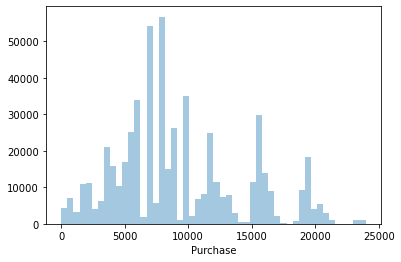

In [11]:
sns.distplot(df['Purchase'],kde=False)

<AxesSubplot:>

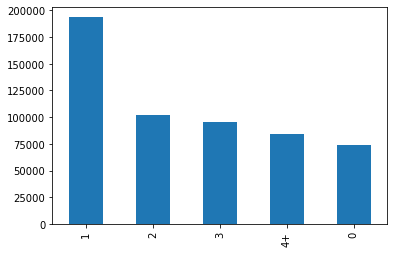

In [12]:
df['Stay_In_Current_City_Years'].value_counts().plot.bar()

In [13]:
df.kurtosis()

User_ID              -1.195501
Occupation           -1.216114
Marital_Status       -1.864997
Product_Category_1    1.234757
Product_Category_2   -1.432267
Product_Category_3   -0.808066
Purchase             -0.338378
dtype: float64

summary of categorical data

In [14]:
df['Product_ID'].describe()

count        550068
unique         3631
top       P00265242
freq           1880
Name: Product_ID, dtype: object

In [15]:
df['City_Category'].describe()

count     550068
unique         3
top            B
freq      231173
Name: City_Category, dtype: object

In [16]:
df['Stay_In_Current_City_Years'].describe()

count     550068
unique         5
top            1
freq      193821
Name: Stay_In_Current_City_Years, dtype: object

In [17]:
df['Gender'].describe()

count     550068
unique         2
top            M
freq      414259
Name: Gender, dtype: object

In [18]:
df['Age'].describe()

count     550068
unique         7
top        26-35
freq      219587
Name: Age, dtype: object

In [19]:
df['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00292142       1
P00160742       1
P00068342       1
P00027842       1
P00299342       1
Name: Product_ID, Length: 3631, dtype: int64

In [20]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [21]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [22]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [23]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [24]:
var=np.var(df)

In [25]:
var

User_ID               2.984567e+06
Occupation            4.254502e+01
Marital_Status        2.418374e-01
Product_Category_1    1.549373e+01
Product_Category_2    2.587333e+01
Product_Category_3    1.701831e+01
Purchase              2.523114e+07
dtype: float64

few insights from our data as mentioned below

1) Our data set consists of 7 numerical attributes and 5 categorical attributes .from Descriptive statistics of numerical attributes we will be extracting the information of the data for every attribute      such as:

   count(number of rows)	
   
   mean	(average)
   
   std	(standard deviation)
   
   min	(minimum value)  
   
   25%	(1st quartile)
   
   50%	(median)
   
   75%	(3rd quartile)
   
   max	(maximum value)

2) Numerical - User_ID,	Occupation, Marital_Status,	Product_Category_1,	Product_Category_2,	Product_Category_3,	Purchase


3) kurtosis() - return unbiased kurtosis(0=normal distribution, +ve=heavier tails, -ve=lighter tails)

4) skew() - return unbiased skew(0=symmetrically distributed, +ve=right-skewed, -ve=left-skewed)

5) from Descriptive statistics of categorical attributes we will be extracting the information of the data for every attribute    such as:

   count    (number of rows)
   
   unique   (number of unique values)
   
   top      (the most common repeated value)
   
   freq     (frequency of top)
   
   Name     (name of the attribute)
   
   dtype    (type of data)

6) categorical - Product_ID, City_Category, Stay_In_Current_City_Years, Gender, Age

7) value_counts() - counts of unique value








#  Perform relevant hypothesis testing (t, chi-Square, Anova tests)

### t-test

test  to compare the purchases of the two genders listed in the dataset using a two sample t-test. The result of the t-test will show a p-value indicating if the two groups are significantly different from each other.

H0-there is no significant difference in the average purchase done by male and female

Ha-there is significant difference in the average purchase done by male and female

In [26]:
df.Purchase.groupby(df.Gender).mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [27]:
female=df[df.Gender=='F']
male=df[df.Gender=='M']

In [28]:
from scipy.stats import ttest_ind

In [29]:
ttest_ind(female.Purchase,male.Purchase,equal_var=False)


Ttest_indResult(statistic=-46.358248669626064, pvalue=0.0)

hence p-value is < 0.05 accepts H0 and reject Ha

### ANOVA TEST

whether  there is a correlation between the age groups in terms of purchase in dollars or not. The hypothesis test we will be going to use is the ANOVA Test.

H0- there is a corelation between age groups in terms of purchase

Ha- there is no corelation between age groups in terms of purchase

In [30]:
df.Purchase.groupby(df.Age).mean()

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

In [31]:
age1=df[df.Age=='0-17'].Purchase
age2=df[df.Age=='18-25'].Purchase
age3=df[df.Age=='26-35'].Purchase
age4=df[df.Age=='36-45'].Purchase
age5=df[df.Age=='46-50'].Purchase
age6=df[df.Age=='51-55'].Purchase
age7=df[df.Age=='55+'].Purchase

In [32]:
ttest, pval = f_oneway(age1, age2, age3, age4, age5, age6, age7)
pval

1.053563939251671e-49

hence p-value is > 0.05 accepts Ha and reject H0

### chi-square testing

test that the purchased item category is correlated with the city the person came from and occupation. The hypothesis we will be using here is Chi-Square Test. In order to use a chi square test function, the data must be arranged in a contingency table.

#### a person from city vs Product_Category_1

H0- there is a correlation btween city in terms of Product_Category_1

Ha- there is no correlation btween city in terms of Product_Category_1

In [33]:
cont_table = pd.crosstab(df.Stay_In_Current_City_Years, df.Product_Category_1)
cont_table



Product_Category_1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Stay_In_Current_City_Years,,,,,,,,,,,,,,,,,,,,
0,18555,3200,2789,1587,20600,2737,558,15341,62,665,3485,538,775,216,916,1320,86,426,199,343
1,48819,8379,7008,4099,53102,7266,1291,41154,132,1853,8145,1408,2006,575,2190,3530,168,1208,607,881
2,26513,4610,3912,2134,28106,3733,601,20238,87,908,4606,733,979,249,1156,1804,115,526,296,532
3,24981,4230,3585,2102,26372,3441,690,19074,77,913,4004,679,943,236,1052,1624,115,489,254,424
4+,21510,3445,2919,1831,22753,3289,581,18118,52,786,4047,589,846,247,976,1550,94,476,247,370


In [34]:
chi2, pval, dof, expected = chi2_contingency(cont_table)
pval

1.8381298398943125e-46

hence p-value is > 0.05 accepts Ha and reject H0

#### a person from city vs Product_Category_2

H0- there is a correlation btween city in terms of Product_Category_2

Ha- there is no correlation btween city in terms of Product_Category_2

In [35]:
cont_table2 = pd.crosstab(df.Stay_In_Current_City_Years, df.Product_Category_2)
cont_table2

Product_Category_2,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
Stay_In_Current_City_Years,,,,,,,,,,,,,,,,,
0,6551,394,3442,3512,2165,103,8624,760,417,1942,756,1441,7153,5180,5893,1783,375
1,16985,984,8927,9166,5754,205,22795,2011,1060,4818,2010,3791,19668,13126,15283,4767,1018
2,9388,564,4981,4869,3170,129,11814,1121,521,2708,982,1912,10185,6994,7930,2465,522
3,8811,534,4672,4672,2841,101,10908,1006,552,2437,951,1785,9576,6637,7371,2272,472
4+,7482,408,3655,4016,2536,88,9947,795,493,2229,829,1602,8526,5918,6778,2033,383


In [36]:
chi2, pval, dof, expected = chi2_contingency(cont_table2)
pval

1.822126020666405e-11

hence p-value is > 0.05 accepts Ha and reject H0

#### a person from city vs Product_Category_3

H0- there is a correlation btween city in terms of Product_Category_3

Ha- there is no correlation btween city in terms of Product_Category_3

In [37]:
cont_table3 = pd.crosstab(df.Stay_In_Current_City_Years, df.Product_Category_3)
cont_table3

Product_Category_3,3.0,4.0,5.0,6.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
Stay_In_Current_City_Years,,,,,,,,,,,,,,,
0,101,242,2264,676,1622,1509,223,250,1264,714,2514,3800,4437,2174,599
1,217,635,5842,1675,4467,3953,615,609,3250,1900,6518,9613,11279,6017,1697
2,111,380,3193,947,2345,2312,313,347,1766,1033,3419,5283,6121,3105,840
3,95,358,2892,873,2142,2110,306,321,1663,953,3149,5034,5694,2880,798
4+,89,260,2467,719,1986,1695,269,278,1303,859,2828,4283,5105,2526,695


In [38]:
chi2, pval, dof, expected = chi2_contingency(cont_table3)
pval

0.0015839122259880616

hence p-value is < 0.05 accepts H0 and reject H1

#### occupation vs Product_Category_1,Product_Category_2,Product_Category_3

H0- there is a correlation btween occupation in terms of Product_Category_1,Product_Category_2,Product_Category_3

Ha- there is no correlation btween occupation in terms of Product_Category_1,Product_Category_2,Product_Category_3

In [39]:
cont_occ1 = pd.crosstab(df.Occupation, df.Product_Category_1)
cont_occ1

Product_Category_1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Occupation,,,,,,,,,,,,,,,,,,,,
0,17643,2971,2635,1481,18985,2568,559,14087,49,636,3752,445,720,196,718,1225,63,426,188,291
1,10315,1922,1559,973,13169,1767,374,11998,26,515,1681,434,554,169,529,784,61,238,139,219
2,5742,1110,958,512,7613,1039,229,6266,12,283,1151,243,247,81,304,448,14,151,62,123
3,3944,666,614,398,5286,651,137,3843,13,195,693,179,220,68,171,342,15,101,49,65
4,19238,3039,3306,1703,20459,2657,449,13830,51,474,3192,372,591,180,744,1192,46,268,178,339
5,3646,589,447,252,3276,379,37,1929,9,85,791,78,96,23,144,213,9,95,24,55
6,4601,821,750,445,5691,735,146,4785,16,189,855,161,205,72,196,416,18,91,63,99
7,16037,2511,1604,1099,15619,2303,327,12620,39,525,2412,465,608,160,632,1168,83,461,192,268
8,512,99,67,39,371,45,5,263,1,13,63,3,8,0,24,16,1,7,5,4


In [40]:
cont_occ2 = pd.crosstab(df.Occupation, df.Product_Category_2)
cont_occ2

Product_Category_2,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
Occupation,,,,,,,,,,,,,,,,,
0,6099,352,3366,3365,2096,89,7977,738,369,1933,703,1362,6847,4613,5526,1603,321
1,3720,209,2005,1968,1299,64,5844,440,299,957,559,1003,5547,2808,3495,1226,245
2,1969,131,1173,1175,779,35,3326,297,149,658,336,556,2826,1653,1893,609,129
3,1365,80,759,851,510,21,2077,190,110,409,228,379,2009,984,1444,396,93
4,6800,456,4098,3674,2229,87,8107,768,310,2046,637,1196,7126,4845,5851,1417,252
5,1222,76,578,667,396,7,1274,168,49,432,124,184,977,926,988,263,72
6,1548,113,933,908,554,27,2427,172,125,474,225,385,2299,1269,1536,471,94
7,5398,269,2184,2682,1799,57,7185,592,315,1419,559,1134,5841,4023,4838,1652,410
8,206,8,93,85,46,1,160,28,11,37,13,23,118,145,105,40,6


In [41]:
cont_occ3 = pd.crosstab(df.Occupation, df.Product_Category_3)
cont_occ3

Product_Category_3,3.0,4.0,5.0,6.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
Occupation,,,,,,,,,,,,,,,
0,77,260,2126,673,1576,1465,196,268,1205,666,2380,3451,4151,1916,561
1,34,134,1297,331,1126,879,175,138,740,428,1750,2072,2538,1485,384
2,30,87,727,209,597,529,79,77,486,229,934,1174,1476,695,212
3,15,50,505,149,387,323,59,72,316,164,649,722,979,468,157
4,90,320,2464,702,1527,1744,161,251,1352,780,2243,3590,4483,2104,553
5,18,48,390,133,268,286,39,56,220,110,379,728,741,339,119
6,17,78,552,152,462,391,76,57,346,186,721,877,1097,640,164
7,44,167,1546,583,1415,1198,186,177,855,626,2025,2926,3519,1964,571
8,2,8,56,13,40,51,1,6,26,17,63,111,105,29,14


In [42]:
chi2, pval, dof, expected = chi2_contingency(cont_occ1)
pval

0.0

hence p-value is < 0.05 accepts H0 and reject H1

In [43]:
chi2, pval, dof, expected = chi2_contingency(cont_occ2)
pval

0.0

hence p-value is < 0.05 accepts H0 and reject H1

In [44]:
chi2, pval, dof, expected = chi2_contingency(cont_occ3)
pval

3.56893330542706e-294

hence p-value is > 0.05 accepts Ha and reject H0